In [1]:
#import statements
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer,RobustScaler,MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from statsmodels.formula.api import ols


import env
import get_function as gf

**Aquire**

In [2]:
# Import from zillow
df = gf.get_zillow_data()

In [3]:
df.head()

,parcelid,logerror,transactiondate,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12177905,-0.103410,2017-01-01,2288172,12177905,NaN,None,None,3.0,4.0,...,NaN,None,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13
1,12095076,-0.001011,2017-01-01,781532,12095076,1.0,None,None,3.0,4.0,...,NaN,None,276684.0,773303.0,2016.0,496619.0,9516.26,None,NaN,6.037461e+13
2,12069064,0.101723,2017-01-01,870991,12069064,NaN,None,None,1.0,2.0,...,NaN,None,18890.0,218552.0,2016.0,199662.0,2366.08,None,NaN,6.037302e+13
3,12790562,-0.040966,2017-01-02,1246926,12790562,NaN,None,None,3.0,4.0,...,NaN,None,177527.0,220583.0,2016.0,43056.0,3104.19,None,NaN,6.037500e+13
4,11104527,0.005963,2017-01-02,1639362,11104527,1.0,None,None,3.0,4.0,...,NaN,None,271715.0,430108.0,2016.0,158393.0,6103.36,None,NaN,6.037920e+13


In [4]:
df.shape

(33701, 62)

**Prepare**

In [5]:
# dropp columns with less than 60% of data non-null and rows with more than 75% of data non-null
df = gf.handle_missing_values(df, prop_required_column = .6, prop_required_row = .75)

In [6]:
df.isnull().sum()

parcelid                          0
logerror                          0
transactiondate                   0
id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           127
calculatedbathnbr                 0
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       0
heatingorsystemtypeid           536
latitude                          0
longitude                         0
lotsizesquarefeet               304
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc               68
rawcensustractandblock            0
regionidcity                    694
regionidcounty                    0
regionidzip                      12
roomcnt                           0
unitcnt                           0
yearbuilt                         7
structuretaxvaluedollarcnt  

In [7]:
df.shape

(33701, 33)

In [8]:
# removing unnessesery columns
df = gf.remove_columns(df, ['roomcnt','assessmentyear','unitcnt','regionidzip','regionidcounty','propertylandusetypeid','propertycountylandusecode','fullbathcnt','calculatedbathnbr','rawcensustractandblock','finishedsquarefeet12','parcelid','transactiondate','id','regionidcity','buildingqualitytypeid','heatingorsystemtypeid','propertyzoningdesc','censustractandblock'])

In [9]:
df.isnull().sum()

logerror                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet               304
yearbuilt                         7
structuretaxvaluedollarcnt       60
taxvaluedollarcnt                 0
landtaxvaluedollarcnt             0
taxamount                         4
dtype: int64

In [10]:
df.shape

(33701, 13)

In [11]:
df = df.rename(columns={'lotsizesquarefeet':'lot_square_feet','calculatedfinishedsquarefeet':'home_square_feet', 'logerror': 'target','bathroomcnt': 'bathroom', 'bedroomcnt': 'bedroom','structuretaxvaluedollarcnt':'structure_value','taxvaluedollarcnt': 'total_value','landtaxvaluedollarcnt':'land_value','taxamoun':'tax_amount','taxamount':'tax_amount','yearbuilt':'year_built'})

In [12]:
# Covert year built into age years

df['age']= 2017 - df.year_built

In [13]:
# Drop year built because we added age column

df.drop(columns='year_built',inplace=True)

In [14]:
# Delete rows where tax value amount does not equal land value + structure value

np.where(df.total_value - (df.land_value + df.structure_value) != 0)

(array([  397,   875,   878,   940,   959,  1203,  1278,  1324,  1726,
         1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
         5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
        12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
        19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
        22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
        31708, 32148, 32171, 32679, 33018, 33032]),)

In [15]:
df.loc[31024]

# 397, 878,   940,   959,  1203,  1278,  1324,  1726,
# 1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
# 5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
# 12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
# 19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
# 22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
# 31708, 32148, 32171, 32679, 33018, 33032]

target              8.249599e-02
bathroom            1.000000e+00
bedroom             3.000000e+00
home_square_feet    1.460000e+03
fips                6.037000e+03
latitude            3.411261e+07
longitude          -1.180782e+08
lot_square_feet     9.099000e+03
structure_value              NaN
total_value         7.898640e+05
land_value          7.898640e+05
tax_amount          9.132300e+03
age                 6.200000e+01
Name: 31024, dtype: float64

In [16]:
df.drop([397,   875,   878,   940,   959,  1203,  1278,  1324,  1726,
         1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
         5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
        12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
        19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
        22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
        31708, 32148, 32171, 32679, 33018, 33032],axis=0,inplace=True)

In [17]:
df.isnull().sum()

target                0
bathroom              0
bedroom               0
home_square_feet      0
fips                  0
latitude              0
longitude             0
lot_square_feet     291
structure_value       0
total_value           0
land_value            0
tax_amount            3
age                   7
dtype: int64

In [18]:
# Split data (train & test)

train, test = gf.split_my_data(df, .80, 123)

In [19]:
# impute lot_square_feet,structure_value, and tax_amount for the mean

train = gf.imputer_9000(train,['lot_square_feet','structure_value','tax_amount', 'age'],'mean')
test = gf.imputer_9000(test,['lot_square_feet','structure_value','tax_amount', 'age'],'mean')

In [20]:
train['home_value_square_footage'] = train.structure_value/train.home_square_feet
train['land_value_square_footage'] = train.land_value/train.lot_square_feet

test['home_value_square_footage'] = test.structure_value/test.home_square_feet
test['land_value_square_footage'] = test.land_value/test.lot_square_feet

In [21]:
train.isnull().sum()

target                       0
bathroom                     0
bedroom                      0
home_square_feet             0
fips                         0
latitude                     0
longitude                    0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
age                          0
home_value_square_footage    0
land_value_square_footage    0
dtype: int64

In [22]:
test.isnull().sum()

target                       0
bathroom                     0
bedroom                      0
home_square_feet             0
fips                         0
latitude                     0
longitude                    0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
age                          0
home_value_square_footage    0
land_value_square_footage    0
dtype: int64

In [23]:
train.head()

,target,bathroom,bedroom,home_square_feet,fips,latitude,longitude,lot_square_feet,structure_value,total_value,land_value,tax_amount,age,home_value_square_footage,land_value_square_footage
33257,0.005565,3.0,4.0,1673.0,6037.0,33985663.0,-118229161.0,3000.0,126192.0,227194.0,101002.0,3505.67,18.0,75.428571,33.667333
8306,0.452906,1.0,3.0,950.0,6037.0,33941666.0,-118235240.0,3251.0,116496.0,191571.0,75075.0,2495.60,52.0,122.627368,23.092894
25859,0.020907,2.0,3.0,1256.0,6037.0,34209673.0,-118628052.0,7525.0,46269.0,84214.0,37945.0,1137.12,56.0,36.838376,5.042525
30676,0.012864,2.0,3.0,1984.0,6037.0,34129558.0,-117719482.0,15368.0,242729.0,683452.0,440723.0,9630.60,40.0,122.343246,28.677967
30916,0.007597,2.0,4.0,2016.0,6037.0,34013213.0,-117863106.0,7595.0,179535.0,223522.0,43987.0,2839.42,40.0,89.055060,5.791573


In [24]:
test.head()

,target,bathroom,bedroom,home_square_feet,fips,latitude,longitude,lot_square_feet,structure_value,total_value,land_value,tax_amount,age,home_value_square_footage,land_value_square_footage
33106,-0.027917,3.0,5.0,3083.0,6037.0,34671833.0,-118084245.0,11565.0,250104.0,309853.0,59749.0,4751.76,4.0,81.123581,5.166364
535,0.008490,1.0,3.0,1115.0,6037.0,33978427.0,-118063427.0,5697.0,96432.0,292670.0,196238.0,3732.85,67.0,86.486099,34.445849
6513,-0.034321,3.0,6.0,2176.0,6037.0,34032118.0,-118303539.0,7184.0,159154.0,424413.0,265259.0,5212.80,95.0,73.140625,36.923580
25153,-0.114455,2.0,2.0,1385.0,6037.0,34010163.0,-118309306.0,5876.0,29632.0,71701.0,42069.0,960.64,105.0,21.394946,7.159462
14729,0.070176,2.0,2.0,2209.0,6037.0,34043071.0,-118493656.0,9041.0,72049.0,228604.0,156555.0,3190.31,91.0,32.616116,17.316115


In [25]:
# Scaling dataframe in two ways

In [26]:
# Scale age, latitude, and longitude using MinMax scaler - why (to presrve distance better)

train = gf.scaler_min_max(train, ['age', 'latitude', 'longitude'])
test = gf.scaler_min_max(test, ['age', 'latitude', 'longitude'])

In [27]:
# Scale bathroom, bedroom, home_square_feet, lot_square_feet, structure_value, total_value, land_value, tax_amount using uniform scaler

# Scale columns using Uniform scaler (to smooth out the distribution and handle outliers)

train = gf.uniform_scaler(train,['bathroom', 'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value', 'total_value', 'land_value', 'tax_amount'])
test = gf.uniform_scaler(test,['bathroom', 'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value', 'total_value', 'land_value', 'tax_amount'])

In [28]:
train[train.target > 0].mean()

target                          0.081899
fips                         6037.004416
home_value_square_footage      90.518032
land_value_square_footage      40.968673
age                             0.418692
latitude                        0.526978
longitude                       0.524213
bathroom                        0.488470
bedroom                         0.515254
home_square_feet                0.518310
lot_square_feet                 0.506307
structure_value                 0.507789
total_value                     0.507428
land_value                      0.505919
tax_amount                      0.506962
dtype: float64

In [29]:
train[train.target < 0].mean()

target                         -0.068046
fips                         6037.003676
home_value_square_footage      90.428961
land_value_square_footage      39.519948
age                             0.433634
latitude                        0.530344
longitude                       0.528297
bathroom                        0.448830
bedroom                         0.481751
home_square_feet                0.477126
lot_square_feet                 0.491834
structure_value                 0.490066
total_value                     0.490615
land_value                      0.492507
tax_amount                      0.491223
dtype: float64

In [30]:
train.target.mean()

0.015217332551863352

In [31]:
train[train.target > 0].count()

target                       14944
fips                         14944
home_value_square_footage    14944
land_value_square_footage    14944
age                          14944
latitude                     14944
longitude                    14944
bathroom                     14944
bedroom                      14944
home_square_feet             14944
lot_square_feet              14944
structure_value              14944
total_value                  14944
land_value                   14944
tax_amount                   14944
dtype: int64

In [32]:
train[train.target < 0].count()

target                       11968
fips                         11968
home_value_square_footage    11968
land_value_square_footage    11968
age                          11968
latitude                     11968
longitude                    11968
bathroom                     11968
bedroom                      11968
home_square_feet             11968
lot_square_feet              11968
structure_value              11968
total_value                  11968
land_value                   11968
tax_amount                   11968
dtype: int64

In [33]:
train.target[train.target > 0].count() /(train.target[train.target > 0].count() + train.target[train.target < 0].count())

0.5552913198573127

Differinces in over and underestimation

over mean = .081

over %56

under mean = -.0680

under %44


In [34]:
stats.ttest_ind(train[train.target < 0].mean(),train[train.target > 0].mean())

Ttest_indResult(statistic=-0.00021801657840273504, pvalue=0.9998275938430903)

There is no significant differince in the overestimations and underestimations

In [35]:
train['absolute_target']= train.target.abs()

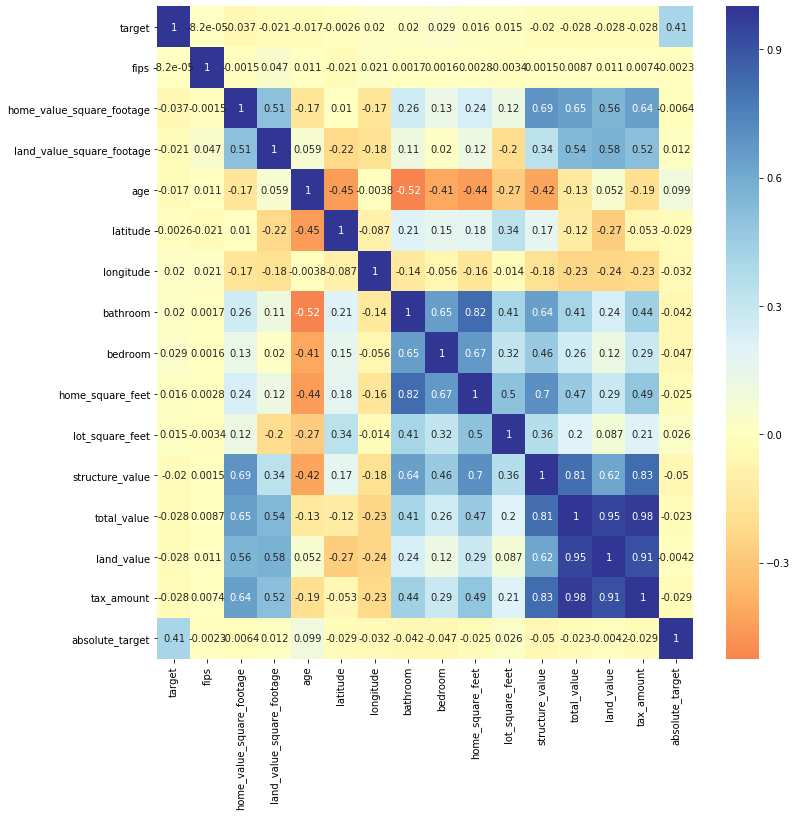

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), cmap='RdYlBu', annot=True, center=0)

In [38]:
# plt.figure(figsize=(22,22))
# sns.pairplot(train[['target', 'home_value_square_footage','land_value_square_footage']])
# plt.show()

home_value_square_footage and land_value_square_foortage show a correlation with logerror 

Going to try correlating home_value_square_footage and land_value_square_foortage  with longitude and latitude and see if a useful patrern emerges

   k           sse
0  1  1.065533e+08
1  2  5.687191e+07
2  3  3.234581e+07
3  4  2.060714e+07
4  5  1.331372e+07
5  6  9.443668e+06
6  7  7.102605e+06
7  8  5.408601e+06
8  9  4.393936e+06


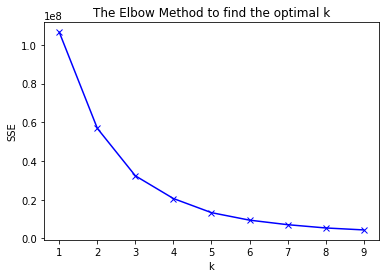

In [39]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['home_value_square_footage', 'longitude', 'latitude']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

We are going to look at models where k = 3, 4, or 5

[[129.11691225   0.49842454   0.53627872]
 [ 58.02583499   0.54725506   0.52568753]
 [362.36330027   0.38850164   0.47434598]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         9830.0  0.009099  0.158652 -1.738639 -0.028781  0.004939  0.038105   
1        16512.0  0.019341  0.171813 -4.655420 -0.029242  0.006748  0.043341   
2          570.0  0.001281  0.224293 -2.175696 -0.034279  0.017214  0.064267   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        5.262999   9830.0  6037.002238  ...   0.878041  0.993188   
1        3.100913  16512.0  6037.005329  ...   0.546021  0.991486   
2        2.069414    570.0  6037.000000  ...   0.990114  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                9830.0  0.068315  0.143478  0.000007  0.014974  0.034018   
1               16512.0  0.078970  0.153809  0.000003  0.015828  0.036554   
2                 570.0  0.110170  0.195321  0.000013  0.024298  0.052839   

                             
              75%       max  
cluster                      
0        0.071147  5.262999  
1        0.081906  4.655420  
2        0.110816  2.175696  

[3 rows x 128 columns]

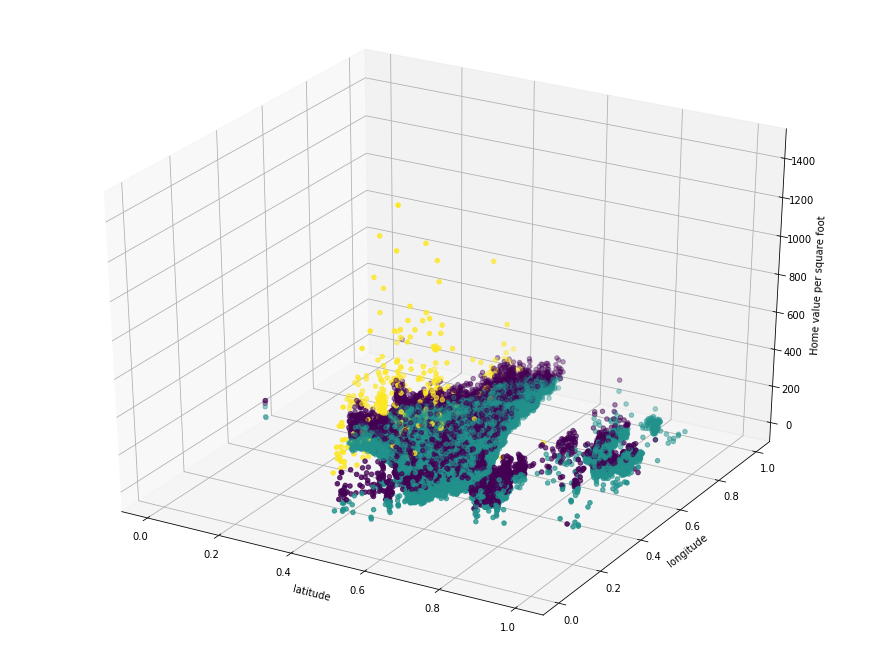

In [40]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[5.49541789e+02 3.55505051e-01 4.70223521e-01]
 [4.80813410e+01 5.45152324e-01 5.14553758e-01]
 [1.05999937e+02 5.23517517e-01 5.46954800e-01]
 [2.10343136e+02 4.41782190e-01 5.00991594e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0          150.0 -0.008554  0.338565 -2.175696 -0.052709  0.021616  0.072871   
1        12101.0  0.020994  0.182174 -4.655420 -0.030478  0.007661  0.046851   
2        12605.0  0.011710  0.145892 -1.738639 -0.026889  0.004694  0.036670   
3         2056.0  0.004460  0.192799 -1.702338 -0.036553  0.007804  0.049524   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        2.069414    150.0  6037.000000  ...   0.990986  1.000000   
1        3.100913  12101.0  6037.003636  ...   0.445070  0.991486   
2        3.394544  12605.0  6037.003491  ...   0.802501  0.993188   
3        5.262999   2056.0  6037.010700  ...   0.970298  0.997639   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0                 150.0  0.157706  0.299436  0.000429  0.034353  0.065532   
1               12101.0  0.084847  0.162568  0.000003  0.016966  0.038634   
2               12605.0  0.064365  0.131447  0.000006  0.013890  0.032276   
3                2056.0  0.085878  0.172664  0.000007  0.019117  0.043568   

                             
              75%       max  
cluster                      
0        0.138815  2.175696  
1        0.088047  4.655420  
2        0.067626  3.394544  
3        0.094778  5.262999  

[4 rows x 128 columns]

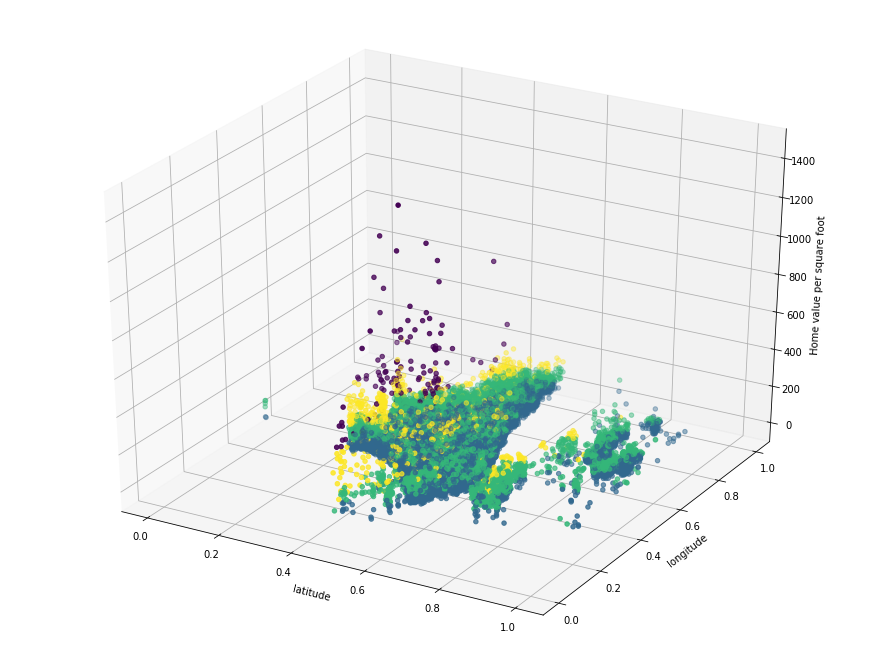

In [41]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[9.25391430e+01 5.39746503e-01 5.48931566e-01]
 [4.19584609e+01 5.41477753e-01 5.06931805e-01]
 [1.56508280e+02 4.69834978e-01 5.25169460e-01]
 [7.40214451e+02 3.64830524e-01 4.78387842e-01]
 [3.09151894e+02 3.96577336e-01 4.76834956e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        12482.0  0.013658  0.144908 -1.623253 -0.026365  0.005068  0.037109   
1         9619.0  0.022532  0.191720 -4.655420 -0.032146  0.007670  0.048260   
2         4152.0  0.005503  0.166105 -1.738639 -0.031295  0.005595  0.041742   
3           56.0 -0.060786  0.231311 -1.019561 -0.056040  0.015172  0.047437   
4          603.0  0.004751  0.222421 -2.175696 -0.034846  0.016450  0.064806   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  12482.0  6037.003525  ...   0.738397  0.993188   
1        3.100913   9619.0  6037.004574  ...   0.363540  0.991486   
2        5.262999   4152.0  6037.005299  ...   0.929669  0.992252   
3        0.244792     56.0  6037.000000  ...   0.991389  0.999529   
4        2.069414    603.0  6037.000000  ...   0.989905  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               12482.0  0.064639  0.130408  0.000006  0.014081  0.032171   
1                9619.0  0.089170  0.171208  0.000003  0.017425  0.040348   
2                4152.0  0.072718  0.149439  0.000007  0.015898  0.037107   
3                  56.0  0.131206  0.199346  0.000429  0.030359  0.052918   
4                 603.0  0.106900  0.195056  0.000011  0.024044  0.052920   

                             
              75%       max  
cluster                      
0        0.067950  3.394544  
1        0.092172  4.655420  
2        0.077516  5.262999  
3        0.134748  1.019561  
4        0.107876  2.175696  

[5 rows x 128 columns]

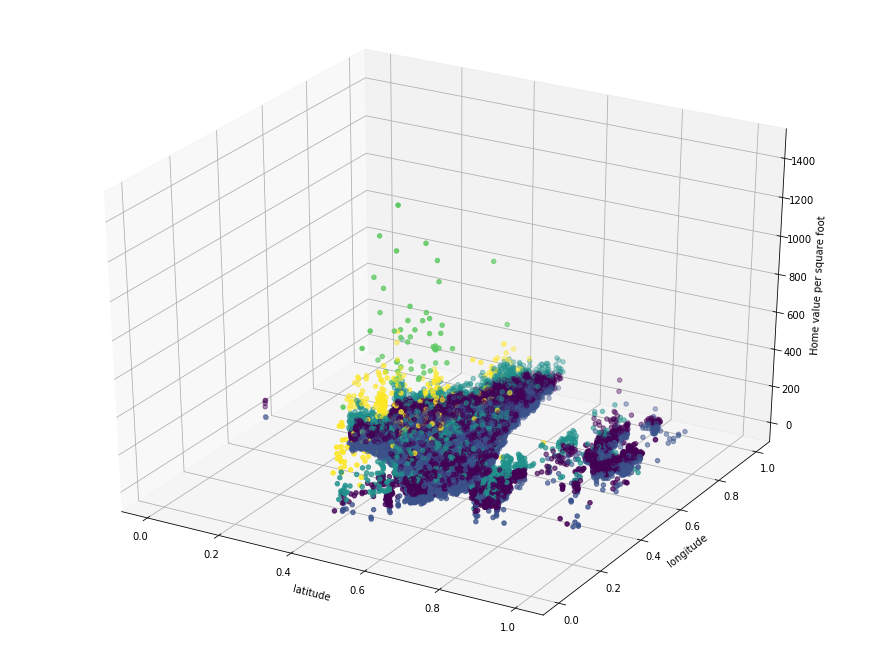

In [42]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

In [43]:
train = train.drop(columns=['absolute_target','cluster'])

   k           sse
0  1  1.090859e+08
1  2  5.551515e+07
2  3  3.221995e+07
3  4  1.906334e+07
4  5  1.274766e+07
5  6  8.904909e+06
6  7  6.585463e+06
7  8  4.888729e+06
8  9  3.820650e+06


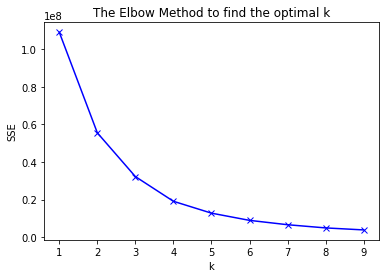

In [44]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['land_value_square_footage', 'longitude', 'latitude']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

[[2.66143040e+01 5.35541235e-01 5.35928452e-01]
 [1.54705953e+02 4.34049109e-01 4.56787427e-01]
 [6.85817789e+02 3.80534051e-01 4.05071725e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        24446.0  0.016480  0.161457 -2.331727 -0.028716  0.005928  0.041248   
1         2367.0  0.001879  0.227688 -4.655420 -0.036298  0.010121  0.049124   
2           99.0  0.022386  0.197343 -0.696273 -0.037158  0.019148  0.068309   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  24446.0  6037.002700  ...   0.684928  0.991891    24446.0   
1        5.262999   2367.0  6037.009294  ...   0.966555  0.997971     2367.0   
2        1.310249     99.0  6037.222222  ...   0.990580  1.000000       99.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.460828  0.271240  0.000000  0.227484  0.455376  0.687388  0.994397  
1        0.884464  0.117483  0.002316  0.850926  0.918304  0.963650  0.999529  
2        0.970410  0.034269  0.758591  0.962606  0.983390  0.990442  1.000000  

[3 rows x 120 columns]

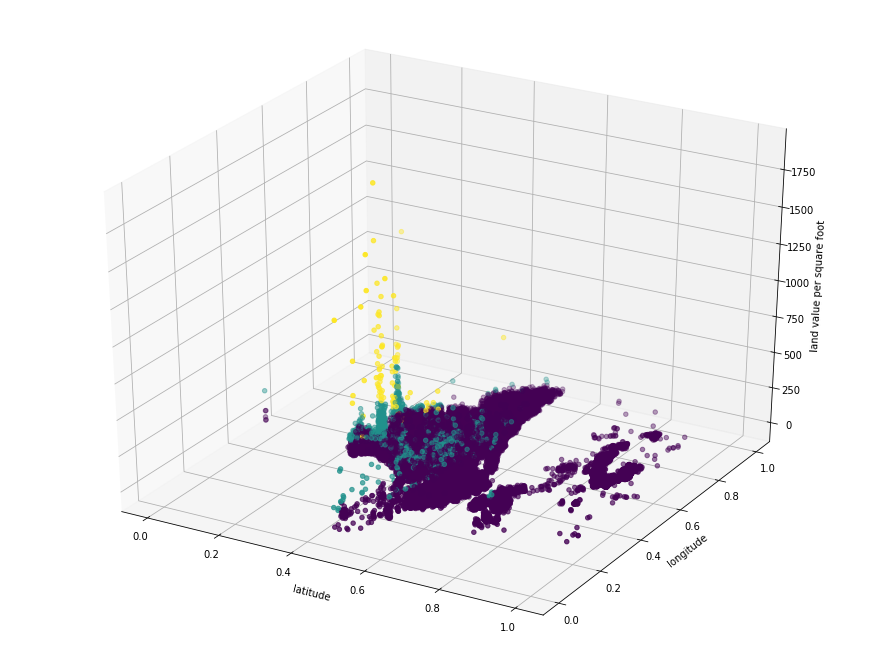

In [45]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.78219623e+01 5.42275603e-01 5.51351648e-01]
 [2.53611003e+02 4.05296980e-01 4.47593685e-01]
 [7.88041280e+01 4.90760546e-01 4.66829425e-01]
 [9.01535908e+02 3.44311632e-01 3.99222303e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        19852.0  0.018495  0.162927 -2.271428 -0.028824  0.006064  0.041705   
1          770.0  0.003881  0.249988 -2.175696 -0.031193  0.014956  0.055135   
2         6242.0  0.006142  0.173199 -4.655420 -0.030479  0.005874  0.040971   
3           48.0  0.021690  0.155048 -0.430161 -0.046968  0.018875  0.072510   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  19852.0  6037.003325  ...   0.561609  0.991891    19852.0   
1        5.262999    770.0  6037.000000  ...   0.983502  0.997971      770.0   
2        3.175688   6242.0  6037.003525  ...   0.902478  0.994565     6242.0   
3        0.664921     48.0  6037.458333  ...   0.991232  1.000000       48.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.399090  0.254912  0.000000  0.184413  0.373619  0.583927  0.994397  
1        0.934761  0.081025  0.190071  0.924242  0.962306  0.982548  0.999529  
2        0.763460  0.156861  0.002316  0.666520  0.784667  0.890014  0.997408  
3        0.978813  0.019695  0.912794  0.968104  0.989947  0.991219  1.000000  

[4 rows x 120 columns]

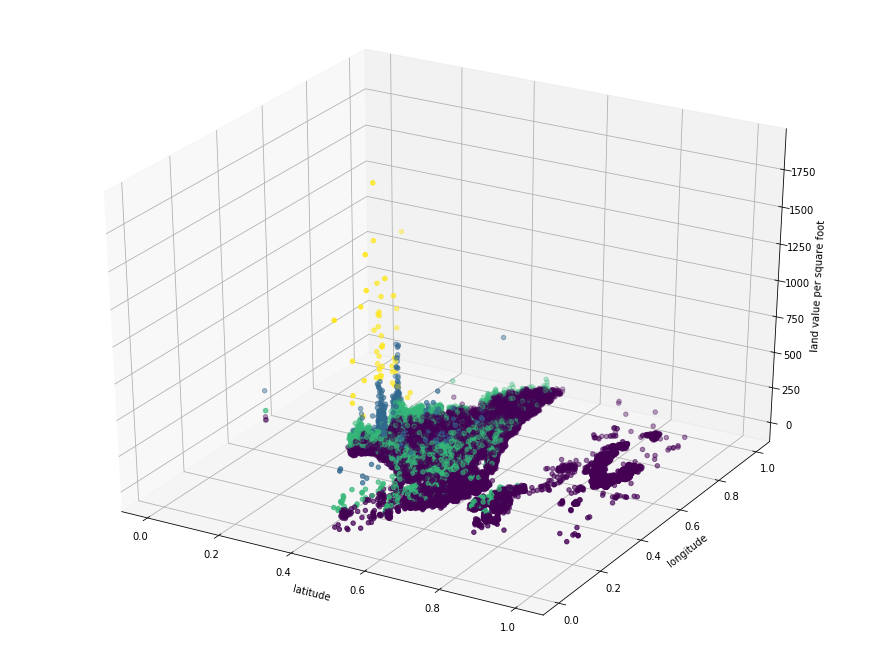

In [46]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[5.87250936e+01 5.10226958e-01 4.76475471e-01]
 [1.02734110e+03 3.30690528e-01 3.99768232e-01]
 [1.36054450e+01 5.45571761e-01 5.61873550e-01]
 [3.54860515e+02 3.91724610e-01 4.29130325e-01]
 [1.52994442e+02 4.25945138e-01 4.60288897e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         8151.0  0.010653  0.151224 -2.331727 -0.027291  0.005931  0.039577   
1           33.0  0.008200  0.097141 -0.205920 -0.044590  0.019148  0.063555   
2        16890.0  0.018801  0.165539 -2.271428 -0.029269  0.006010  0.042112   
3          301.0  0.004209  0.212650 -2.175696 -0.025997  0.020871  0.064884   
4         1537.0  0.002346  0.255719 -4.655420 -0.042345  0.008874  0.049075   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.175688   8151.0  6037.005398  ...   0.846094  0.991891     8151.0   
1        0.273869     33.0  6037.666667  ...   0.991449  1.000000       33.0   
2        3.394544  16890.0  6037.001303  ...   0.479421  0.991768    16890.0   
3        1.310249    301.0  6037.000000  ...   0.989968  0.997971      301.0   
4        5.262999   1537.0  6037.014314  ...   0.966861  0.994565     1537.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.698119  0.169781  0.079443  0.580005  0.711503  0.830019  0.993300  
1        0.982985  0.017279  0.930036  0.985499  0.990244  0.991407  1.000000  
2        0.359472  0.246233  0.000000  0.157878  0.320191  0.520219  0.994397  
3        0.955809  0.061448  0.190071  0.946523  0.973564  0.988887  0.999529  
4        0.893304  0.111159  0.002316  0.865838  0.926148  0.964161  0.997408  

[5 rows x 120 columns]

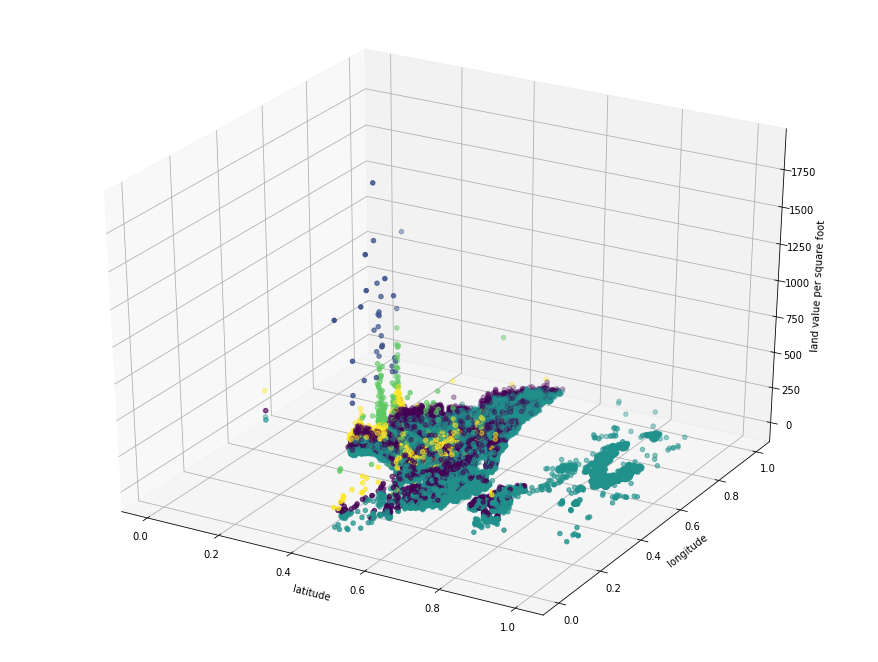

In [47]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

In [48]:
X = train[['land_value_square_footage', 'longitude', 'latitude','home_value_square_footage']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.58265306e+01 5.53164278e-01 5.39101471e-01 5.20008294e+01]
 [1.67005490e+02 4.22776965e-01 4.62702898e-01 1.91749932e+02]
 [2.17480133e+02 3.60089451e-01 4.74593829e-01 5.24123840e+02]
 [4.37032683e+01 5.13058470e-01 5.27199029e-01 1.12648058e+02]
 [8.42879633e+02 3.71535323e-01 3.90696381e-01 2.77097443e+02]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13286.0  0.021413  0.174244 -2.271428 -0.030393  0.006799  0.045273   
1         1660.0  0.004707  0.207576 -0.976064 -0.038623  0.008267  0.050507   
2          164.0 -0.008549  0.333762 -2.175696 -0.051755  0.024116  0.075334   
3        11745.0  0.010031  0.151261 -4.655420 -0.026543  0.005188  0.036743   
4           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.100913  13286.0  6037.004968  ...   0.464020  0.984254    13286.0   
1        5.262999   1660.0  6037.000000  ...   0.972848  0.997971     1660.0   
2        2.069414    164.0  6037.000000  ...   0.990150  0.997010      164.0   
3        3.394544  11745.0  6037.001873  ...   0.812635  0.992139    11745.0   
4        0.664921     57.0  6037.385965  ...   0.991040  1.000000       57.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.294021  0.209843  0.000000  0.123322  0.254123  0.426686  0.973109  
1        0.917213  0.091352  0.002316  0.898951  0.943757  0.972188  0.997639  
2        0.970871  0.078021  0.079443  0.974845  0.989978  0.990735  0.999529  
3        0.665068  0.188824  0.005995  0.526570  0.685601  0.819082  0.991486  
4        0.975745  0.024471  0.860021  0.965384  0.988705  0.991075  1.000000  

[5 rows x 120 columns]

In [49]:
X = train[['land_value_square_footage', 'longitude', 'latitude','home_value_square_footage']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.60099157e+01 5.53301243e-01 5.39278017e-01 5.24665414e+01]
 [4.41312534e+01 5.11918345e-01 5.26638917e-01 1.13375689e+02]
 [2.15074875e+02 3.60538190e-01 4.75329270e-01 5.27636610e+02]
 [8.42879633e+02 3.71535323e-01 3.90696381e-01 2.77097443e+02]
 [1.69227579e+02 4.22457417e-01 4.62132226e-01 1.92373506e+02]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13490.0  0.021376  0.173515 -2.271428 -0.030191  0.006848  0.045262   
1        11579.0  0.009873  0.151732 -4.655420 -0.026733  0.005103  0.036592   
2          161.0 -0.009271  0.336814 -2.175696 -0.052449  0.022360  0.076803   
3           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
4         1625.0  0.004638  0.208855 -0.976064 -0.038458  0.008179  0.050481   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.100913  13490.0  6037.004893  ...   0.468389  0.984254    13490.0   
1        3.394544  11579.0  6037.001900  ...   0.815895  0.992139    11579.0   
2        2.069414    161.0  6037.000000  ...   0.990146  0.997010      161.0   
3        0.664921     57.0  6037.385965  ...   0.991040  1.000000       57.0   
4        5.262999   1625.0  6037.000000  ...   0.972990  0.997971     1625.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.297244  0.210954  0.000000  0.125327  0.257937  0.431300  0.990766  
1        0.668578  0.188102  0.005995  0.531443  0.689486  0.821574  0.991486  
2        0.970650  0.078726  0.079443  0.975026  0.989979  0.990760  0.999529  
3        0.975745  0.024471  0.860021  0.965384  0.988705  0.991075  1.000000  
4        0.918042  0.090745  0.002316  0.899511  0.944655  0.972491  0.997639  

[5 rows x 120 columns]

In [50]:
train = train.drop(columns=['cluster'])


   k           sse
0  1  2.156597e+08
1  2  1.328530e+08
2  3  9.908190e+07
3  4  7.820174e+07
4  5  6.369541e+07
5  6  5.350860e+07
6  7  4.565806e+07
7  8  3.894174e+07
8  9  3.372579e+07


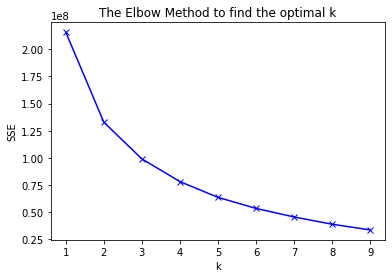

In [51]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [52]:
X = train

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()


[[ 2.12634609e-02  6.03700478e+03  5.32628193e+01  1.62365684e+01
   4.43956866e-01  5.40004956e-01  5.53221641e-01  4.09048889e-01
   4.76535291e-01  4.50247698e-01  4.95845609e-01  3.13567044e-01
   2.98767639e-01  3.20380675e-01  3.02095642e-01]
 [ 9.50681987e-03  6.03700194e+03  1.14410028e+02  4.50373746e+01
   4.01030428e-01  5.25124991e-01  5.10543315e-01  5.19292103e-01
   5.22088725e-01  5.34320236e-01  5.15765952e-01  6.69509873e-01
   6.77272198e-01  6.50625543e-01  6.74130305e-01]
 [ 5.90741103e-03  6.03700000e+03  1.95294034e+02  1.71721962e+02
   4.44312469e-01  4.61560442e-01  4.20047250e-01  6.31036724e-01
   5.39597371e-01  6.57870221e-01  4.22724458e-01  8.52420728e-01
   9.25923505e-01  9.29708552e-01  9.20185059e-01]
 [ 1.42397474e-02  6.03738596e+03  2.77097443e+02  8.42879633e+02
   2.93668955e-01  3.90696381e-01  3.71535323e-01  8.04827726e-01
   5.94364700e-01  8.02042019e-01  1.43527886e-01  9.40318823e-01
   9.78049429e-01  9.80810839e-01  9.75744657e-01]
 [-1

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13790.0  0.021295  0.175856 -2.331727 -0.030096  0.006821  0.045273   
1        11339.0  0.009485  0.147635 -4.655420 -0.027164  0.005037  0.036423   
2         1577.0  0.005908  0.210826 -0.976064 -0.037362  0.008380  0.050900   
3           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
4          149.0 -0.012127  0.349278 -2.175696 -0.052796  0.022360  0.076803   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  13790.0  6037.004786  ...   0.473802  0.984254    13790.0   
1        3.175688  11339.0  6037.001940  ...   0.820110  0.992139    11339.0   
2        5.262999   1577.0  6037.000000  ...   0.973660  0.997971     1577.0   
3        0.664921     57.0  6037.385965  ...   0.991040  1.000000       57.0   
4        2.069414    149.0  6037.000000  ...   0.990161  0.997010      149.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.301782  0.212472  0.000000  0.128374  0.264058  0.438107  0.990766  
1        0.673995  0.186691  0.005995  0.538641  0.696136  0.826016  0.991486  
2        0.919892  0.089951  0.002316  0.902324  0.946140  0.973118  0.997639  
3        0.975745  0.024471  0.860021  0.965384  0.988705  0.991075  1.000000  
4        0.971143  0.080238  0.079443  0.976265  0.989984  0.990795  0.999529  

[5 rows x 120 columns]

In [53]:
X = train

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[ 1.32351040e-02  6.03700512e+03  9.36084380e+01  3.61000307e+01
   4.01994351e-01  5.41473137e-01  5.33723581e-01  4.86948657e-01
   5.14293658e-01  5.04024330e-01  5.06557689e-01  5.79339136e-01
   5.81930773e-01  5.68609317e-01  5.80945433e-01  6.68553264e-01]
 [ 7.89799376e-03  6.03700000e+03  1.90076205e+02  2.30999111e+02
   4.40603894e-01  4.49903773e-01  4.10852020e-01  6.52216013e-01
   5.46764426e-01  6.70781220e-01  3.30006271e-01  8.46665602e-01
   9.35219690e-01  9.45339191e-01  9.30480598e-01  2.02145411e+00]
 [ 2.98634553e-03  6.03700000e+03  1.63555524e+02  6.92229237e+01
   4.06422670e-01  5.06912284e-01  4.70689587e-01  5.92756008e-01
   5.39212063e-01  6.11226698e-01  5.52818073e-01  8.20135542e-01
   8.30597555e-01  7.93002598e-01  8.25238435e-01  1.21445087e+00]
 [ 2.05588144e-02  6.03746809e+03  2.91905417e+02  9.07539243e+02
   3.04347826e-01  3.97788410e-01  3.48436959e-01  8.08096159e-01
   6.03374167e-01  8.01814929e-01  1.53450484e-01  9.40113120e-01
   9.80

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        12896.0  0.013259  0.149876 -4.655420 -0.025970  0.004908  0.036038   
1          838.0  0.007846  0.229104 -0.860147 -0.034775  0.013270  0.054529   
2         3458.0  0.002998  0.157215 -1.738639 -0.034118  0.005595  0.043697   
3           47.0  0.020559  0.156524 -0.430161 -0.049346  0.018603  0.068481   
4         9519.0  0.023346  0.184682 -2.271428 -0.032089  0.007869  0.049260   
5          154.0 -0.010415  0.343415 -2.175696 -0.052218  0.021616  0.073917   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  12896.0  6037.005118  ...   0.744896  0.992139    12896.0   
1        5.262999    838.0  6037.000000  ...   0.980470  0.997971      838.0   
2        2.591723   3458.0  6037.000000  ...   0.924346  0.991804     3458.0   
3        0.664921     47.0  6037.468085  ...   0.991304  1.000000       47.0   
4        3.100913   9519.0  6037.002311  ...   0.366624  0.984254     9519.0   
5        2.069414    154.0  6037.000000  ...   0.990145  0.997010      154.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.581003  0.194009  0.005995  0.430141  0.586130  0.736593  0.991486  
1        0.930430  0.079440  0.190071  0.918678  0.956661  0.977543  0.997639  
2        0.825373  0.143979  0.002316  0.759125  0.868383  0.931832  0.993276  
3        0.978555  0.019826  0.912794  0.967738  0.989942  0.991281  1.000000  
4        0.224105  0.178114  0.000000  0.088227  0.180868  0.316831  0.973109  
5        0.969375  0.081127  0.079443  0.975321  0.989981  0.990768  0.999529  

[6 rows x 120 columns]

In [54]:
train.columns

Index(['target', 'fips', 'home_value_square_footage',
       'land_value_square_footage', 'age', 'latitude', 'longitude', 'bathroom',
       'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value',
       'total_value', 'land_value', 'tax_amount', 'cluster'],
      dtype='object')

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

def regression_errors(y, yhat, data_frame):
    # SSE - sum of squared errors using MSE * len()
    SSE = mean_squared_error(y, X_train.yhat) * len(X_train)
    # MSE - mean of squared errors
    MSE = mean_squared_error(y, X_train.yhat)
    # ESS - explained sum of squares
    ESS = sum((X_train.yhat - train.target.mean()) ** 2)
    # TSS - total sum of squares
    TSS = SSE + ESS
    # RMSE - root mean squared error
    RMSE = sqrt(MSE)
    print("SSE: ", SSE, "EES: ", ESS, "TSS: ", TSS, "MSE: ", MSE, "RMSE: ", RMSE)
    return SSE, ESS, TSS, MSE, RMSE

In [56]:
# Create linear model
X_train = pd.DataFrame(train.drop(columns=['target','cluster']))
y_train = pd.DataFrame(train.target)

In [57]:
# Baseline Everything
x = pd.DataFrame(train.drop(columns=['target','cluster']))
y = pd.DataFrame(train.target)

regr = ols('y ~ x', data = train).fit()

X_train['yhat'] = regr.predict(x)

#regr.summary()

In [58]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.194489257288 EES:  2.988526771006045 TSS:  764.183016028294 MSE:  0.0282845752548041 RMSE:  0.16818018686755018


In [60]:
# Baseline Everything except 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['home_value_square_footage', 'land_value_square_footage']))
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [61]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.194489257288 EES:  2.9885267710059753 TSS:  764.1830160282939 MSE:  0.0282845752548041 RMSE:  0.16818018686755018


In [62]:
# Baseline Everything including 'home_value_square_footage', 'land_value_square_footage'
# Except removing 4 columns that calulated: columns = 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['structure_value', 'lot_square_feet', 'home_square_feet', 'land_value','absolute_target']))
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

KeyError: "['absolute_target'] not found in axis"

In [63]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.194489257288 EES:  2.9885267710059753 TSS:  764.1830160282939 MSE:  0.0282845752548041 RMSE:  0.16818018686755018


In [64]:
# Baseline of only created features: 'home_value_square_footage', 'land_value_square_footage')
x = X_train[['home_value_square_footage', 'land_value_square_footage']]
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [65]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  763.1119266130522 EES:  1.071089415241757 TSS:  764.183016028294 MSE:  0.028355823670223403 RMSE:  0.16839187530942046


**Absolute**

In [66]:
# Baseline Everything
x = pd.DataFrame(train.drop(columns=['target','absolute_target','cluster']))
y = pd.DataFrame(train.absolute_target)

regr = ols('y ~ x', data = train).fit()

X_train['yhat'] = regr.predict(x)

#regr.summary()

KeyError: "['absolute_target'] not found in axis"

In [67]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  763.1119266130522 EES:  1.071089415241757 TSS:  764.183016028294 MSE:  0.028355823670223403 RMSE:  0.16839187530942046


In [71]:
# Baseline Everything except 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['home_value_square_footage', 'land_value_square_footage']))
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

AttributeError: 'DataFrame' object has no attribute 'absolute_target'

In [69]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  763.1119266130522 EES:  1.071089415241757 TSS:  764.183016028294 MSE:  0.028355823670223403 RMSE:  0.16839187530942046


In [70]:
# Baseline Everything including 'home_value_square_footage', 'land_value_square_footage'
# Except removing 4 columns that calulated: columns = 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['structure_value', 'lot_square_feet', 'home_square_feet', 'land_value','absolute_target']))
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

KeyError: "['absolute_target'] not found in axis"

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

In [ ]:
# Baseline of only created features: 'home_value_square_footage', 'land_value_square_footage')
x = X_train[['home_value_square_footage', 'land_value_square_footage']]
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

**Cluster on target**

   k         sse
0  1  764.183016
1  2  492.995315
2  3  354.513620
3  4  239.427309
4  5  184.284101
5  6  137.085411
6  7  111.057813
7  8   91.738772
8  9   74.555304


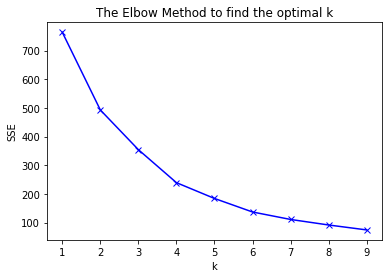

In [72]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['target']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [73]:
X = train[['target']]

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        20490.0  0.005826  0.036179 -0.073202 -0.019291  0.005759  0.030193   
1          422.0  0.623094  0.218369  0.399299  0.458117  0.553933  0.713834   
2           43.0  2.225894  0.718569  1.457087  1.658312  2.199889  2.474449   
3         2944.0 -0.151840  0.083036 -0.476475 -0.182947 -0.122419 -0.091797   
4         2858.0  0.175882  0.075766  0.090706  0.113995  0.152510  0.219381   
5          155.0 -0.801046  0.454511 -4.655420 -0.865814 -0.673975 -0.556667   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        0.090647  20490.0  6037.004295  ...   0.744980  0.997971    20490.0   
1        1.378095    422.0  6037.000000  ...   0.623126  0.990399      422.0   
2        5.262999     43.0  6037.000000  ...   0.794408  0.991675       43.0   
3       -0.073273   2944.0  6037.000000  ...   0.777904  1.000000     2944.0   
4        0.398988   2858.0  6037.007698  ...   0.765382  0.993838     2858.0   
5       -0.478807    155.0  6037.000000  ...   0.921650  0.994565      155.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.506004  0.281917  0.000000  0.266925  0.512609  0.748061  0.999529  
1        0.397501  0.286397  0.005085  0.165588  0.354070  0.590395  0.990856  
2        0.449380  0.355158  0.008433  0.114329  0.328725  0.819785  0.991599  
3        0.485253  0.303506  0.001659  0.213172  0.462752  0.761208  1.000000  
4        0.482801  0.309588  0.001536  0.205041  0.455687  0.758155  0.995702  
5        0.590134  0.354241  0.005448  0.205706  0.690988  0.925323  0.997408  

[6 rows x 120 columns]

In [74]:
train[train.cluster == 0].describe()

,target,fips,home_value_square_footage,land_value_square_footage,age,latitude,longitude,bathroom,bedroom,home_square_feet,lot_square_feet,structure_value,total_value,land_value,tax_amount,cluster
count,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.000000,20490.0
mean,0.005826,6037.004295,90.819800,40.025892,0.412810,0.531074,0.530146,0.479727,0.509882,0.504193,0.494163,0.509136,0.504785,0.501087,0.506004,0.0
std,0.036179,0.307362,58.851429,61.368707,0.165345,0.160893,0.179398,0.307691,0.265153,0.282798,0.284027,0.281856,0.281765,0.283725,0.281917,0.0
min,-0.073202,6037.000000,0.039833,0.003805,0.000000,0.000000,0.010076,0.000000,0.000000,0.000000,0.000706,0.000024,0.000000,0.000880,0.000000,0.0
25%,-0.019291,6037.000000,56.299632,7.006929,0.318841,0.413759,0.394220,0.474747,0.439394,0.261849,0.249719,0.269160,0.265406,0.254446,0.266925,0.0
50%,0.005759,6037.000000,83.544602,25.672895,0.442029,0.512087,0.531261,0.474747,0.439394,0.506605,0.494855,0.513612,0.510611,0.507025,0.512609,0.0
75%,0.030193,6037.000000,111.296987,50.162757,0.492754,0.592322,0.648633,0.808081,0.797980,0.749206,0.737745,0.751775,0.746990,0.744980,0.748061,0.0
max,0.090647,6059.000000,1186.915888,1882.546201,0.949275,1.000000,0.969338,1.000000,0.995960,0.999199,1.000000,1.000000,0.999309,0.997971,0.999529,0.0


**TAKEAWAYS**

Z-estimates tend to be overestimates slightly more frequently then they 
are underestimates.

56% of estimates are overestimated.

44% of estimates are underestimated.

The difference in the amount of error between over and under 
estimations is also minimal.

overestimated Zestimate have a mean log error of .081

underestimated Zestimate have a mean log error of -.068

This would seem to suggest, that whether a property is over or under-estimated is not a major factor driving the log error.

However...

The log error is computed by taking the log of the z-estimate and the subtracting the log of the properties true value.

log(z-estimate) - log(true value) = log error

This stated reason for using logs rather than using percentqge values was to prevent properties with large values from skewing the data.

When calculated this way the percent change in a value will result in a proportional change in the numbers log value. 

If a given value is doubled there will be about a .301 increase in its resulting log value.

If a value is halved there will be about a .301 decrease in its resulting log value.
 
value($)      log value

4,000,000   =  6.602

2,000,000   =  6.301

1,000,000   =  6

500,000     =  5.698

250,000     =  5.397

125,000     =  5.096

Value has a "half-life" of .301 log

This would suggest that a positive log error carries a higher relative value than a negative log error.

For example:

property value            = 2,000,000
z-estimate                = 4,000,000 

property is worth in logs = 6.301
z-estimate in logs        = 6.602
log error                 = .301

difference in value       = 2,000,000

overestimated by 100%

property value            = 2,000,000
z-estimate                = 1,000,000 

property is worth in logs = 6.602
z-estimate in logs        = 6.301
log error                 = -.301

difference in value       = 1,000,000

underestimated by 50%

Based on this it seems that positive log errors show twice the error amount that negative log errors do.

For future iterations of this project one would need find a way to account for how positive and negative log errors are 'scaled' differintly in order to improve model performance.

possibly running an analysis of positive and negative log errors independantly.